In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table

In [2]:
repo_root = os.environ['HOME'] + '/DESI/'

sys.path.append(repo_root)

In [3]:
from   cosmo         import cosmo, fsky

In [4]:
field  = 'G12'
dryrun = False
realz  = 0

In [5]:
# Parameters
field = "G9"


In [6]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_{}_{}.fits'.format(field, realz)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.57902396),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763)])

In [7]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_{}_{}.fits'.format(field, realz)

if dryrun:
    fpath = fpath.replace('.fits', '_dryrun.fits')

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.57902396),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7994894552069755)])

In [8]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,N8,FILLFACTOR,BOUND_DIST,BOUND_ID
float32,float32,float32,float32,int64,bytes2,float32,float32,float32,int64,int32,float64,float64,int64
134.1185,-0.808964,0.16447665,662216.5,541755,G9,477.0616,-7.3086348,-10.883285,0,1090,1.016477859200191,9.774657518542892,673717
138.95676,2.6404722,0.24579756,2098134.0,1104169,G9,698.7809,48.364056,26.22122,0,970,0.9045720398387022,4.346966069687991,337314
130.0458,-0.3668098,0.24854927,2165501.2,1081817,G9,705.64355,-61.12442,-10.666243,0,1065,0.9931641468332142,11.795548078978328,424942
133.66829,0.29416147,0.23967364,1952958.9,827053,G9,684.2005,-15.8584385,-2.4309745,0,1102,1.02766844113634,26.83388185444483,1111677
135.87224,-1.7450509,0.28237346,3105515.2,1542999,G9,798.11597,12.209394,-31.261341,0,847,0.789868574993176,2.9014505174250056,1422889
133.17665,2.6008437,0.17796256,831746.6,575370,G9,514.3087,-16.33149,18.897867,0,906,0.8448889361792413,3.227366432430104,1362459
135.21371,1.9626317,0.2526735,2268975.8,1759399,G9,719.2336,2.7313383,18.392054,0,1070,0.9978268893066096,12.592323623895311,221050
138.70532,0.047041986,0.29556105,3530214.8,161017,G9,831.9195,53.93429,-6.5437675,0,1095,1.0211406016735864,9.00704178614997,1244039
135.60945,2.12468,0.23722042,1896622.0,1646351,G9,677.43146,7.2503963,19.241734,0,1076,1.0034221802746839,10.051226966645427,1821948


In [9]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_ddp_n8_{}_{}.fits'.format(field, realz)

if dryrun:
    fpath = fpath.replace('.fits', '_dryrun.fits')

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G9'),
             ('AREA', 180.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.57902396),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7994894552069755),
             ('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extincti

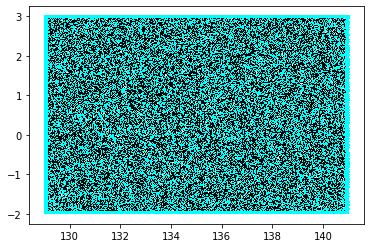

In [10]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

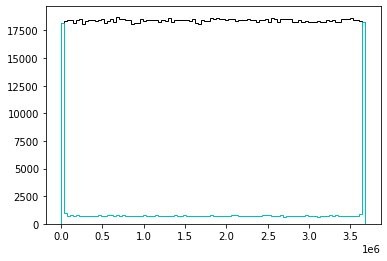

In [11]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

(0.0, 0.6)

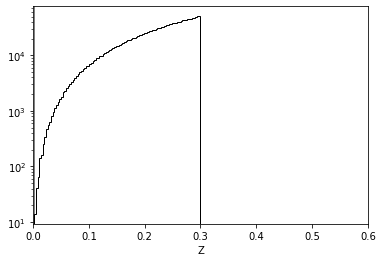

In [12]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')
pl.axvline(300. / 2.9979e5, lw=0.5, c='k')
pl.yscale('log')
pl.xlabel('Z')

pl.xlim(0.0, 0.6)

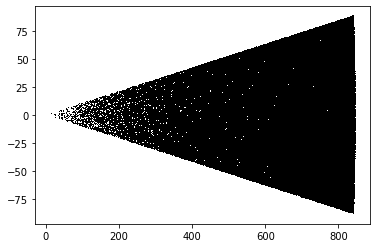

In [13]:
pl.plot(rand['CARTESIAN_X'][::10], rand['CARTESIAN_Y'][::10], marker=',', lw=0.0, c='k')

Text(0, 0.5, 'y')

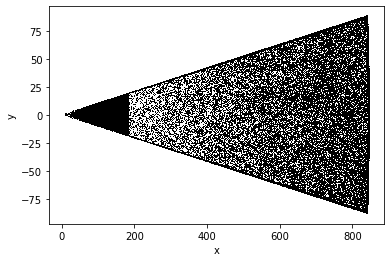

In [14]:
pl.plot(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)], rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')
pl.xlabel('x')
pl.ylabel('y')

(0.0, 1000.0)

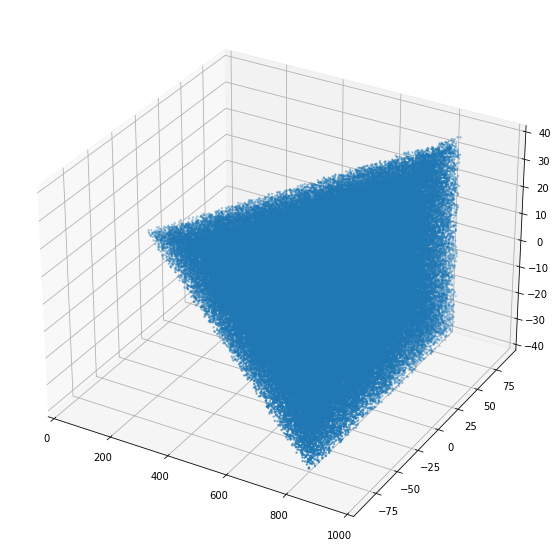

In [15]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][::10],\
           rand['CARTESIAN_Y'][::10],\
           rand['CARTESIAN_Z'][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

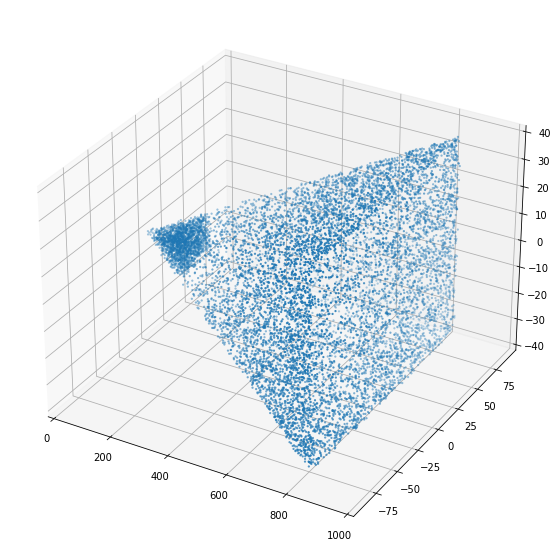

In [16]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Z'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [17]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010000070637317043

In [18]:
np.mean(rand['IS_BOUNDARY'].data)

0.058758293771907756

In [19]:
rand['N8'].data.min(), rand['N8'].data.max()

(12, 1227)

(50.0, 1500.0)

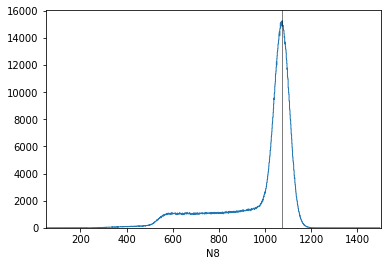

In [20]:
_ = pl.hist(rand['N8'], bins=np.arange(0, 1500, 1), histtype='step')
pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)
pl.xlabel('N8')
pl.xlim(50., 1500.)

In [21]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

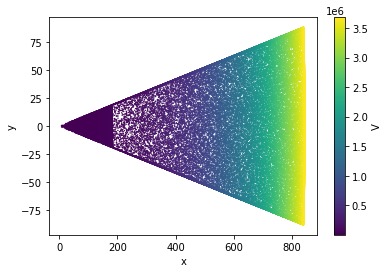

In [22]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='V')

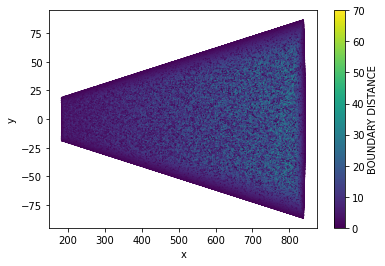

In [23]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='BOUNDARY DISTANCE')

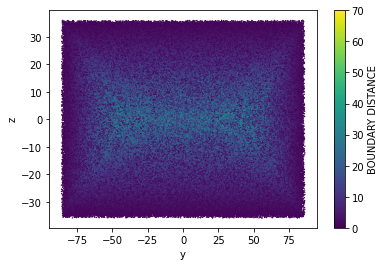

In [24]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_Y'][isin], rand['CARTESIAN_Z'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('y')
pl.ylabel('z')
pl.colorbar(label='BOUNDARY DISTANCE')

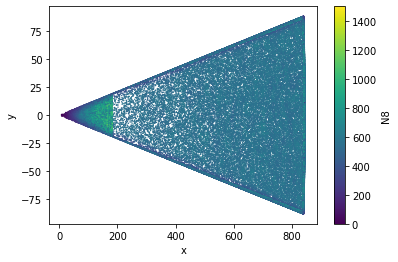

In [25]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['N8'][isin], vmin=0, vmax=1500, s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='N8')

(0.2, 1.2)

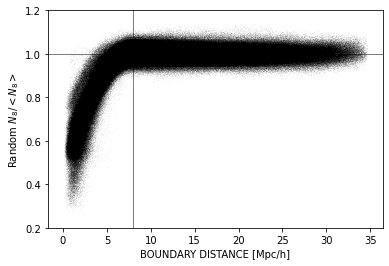

In [26]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'][isin], rand['N8'][isin] / rand.meta['NRAND8'], marker='.', lw=0.0, s=1, alpha=0.1, c='k')

pl.xlabel('BOUNDARY DISTANCE [Mpc/h]')
pl.ylabel(r'Random $N_8 / <N_8>$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

Text(0.5, 0, 'BOUND_DIST [Mpc/h]')

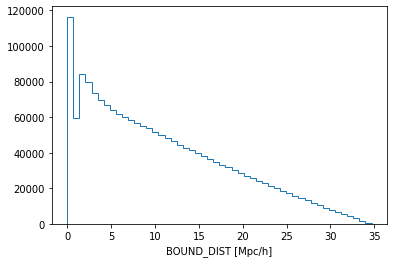

In [27]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [Mpc/h]')

In [28]:
gold = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp_n8.fits')
gold.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

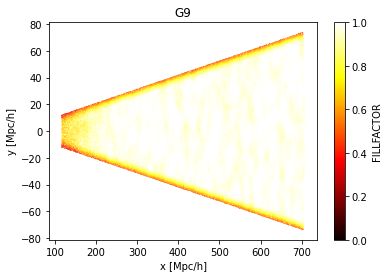

In [29]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

# TODO: Get from randoms header when available. 
ddp_zmin = gold.meta['DDP1_ZMIN']
ddp_zmax = gold.meta['DDP1_ZMAX']
        
isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
randoms_slice = randoms_slice_nolimits[isin]
    
plt.scatter(randoms_slice['CARTESIAN_X'],\
            randoms_slice['CARTESIAN_Y'],\
            c=randoms_slice['FILLFACTOR'],\
            marker='.',\
            lw=0.0,\
            s=1,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('x [Mpc/h]')
pl.ylabel('y [Mpc/h]')

pl.colorbar(label='FILLFACTOR')
    
# pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
# pl.ylim(-80., 80.)
    
plt.title('{}'.format(field))
plt.show()

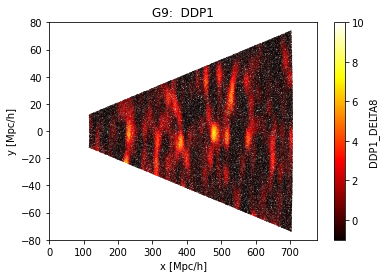

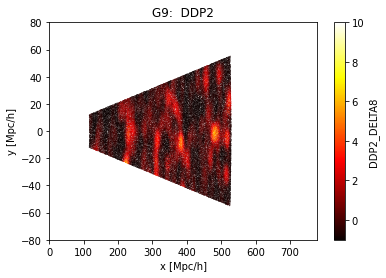

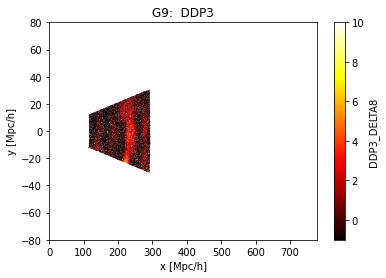

In [30]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=-1.,\
                vmax=10.,\
                cmap='hot')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label='DDP{}_DELTA8'.format(idx))
    
    pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [31]:
cmap = plt.cm.tab20c  # define the colormap

# extract all colors from the .jet map

cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 4, 5)
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

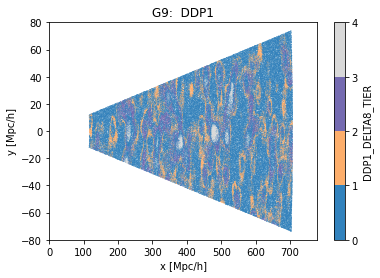

In [32]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 2, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8_TIER'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                cmap=cmap,\
                norm=norm)

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label='DDP{}_DELTA8_TIER'.format(idx))
    
    pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

Text(0, 0.5, 'DDP2_DELTA8')

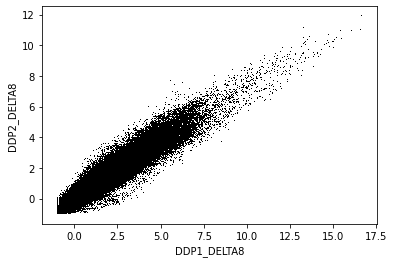

In [33]:
# Larger minimum redshift. 
ddp1_zmin = gold.meta['DDP1_ZMIN']

# Smaller maximum redshift. 
ddp3_zmax = gold.meta['DDP2_ZMAX']
            
isin = (rand['Z'] > ddp1_zmin) & (rand['Z'] < ddp3_zmax)

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlabel('DDP1_DELTA8')
pl.ylabel('DDP2_DELTA8')

# Done.